# Анализ базы данных с помощью SQL

Сервис для чтения книг был приобретен нашей компанией. 

**Цель исследования**

Проанализировать базу данных компании в рамках подготовки ценностного предложения для нового продукта. 

**Задачи исследования:**
   1. Рассчитать количество книг, которые вышли после 1 января 2000 года;
   2. Для каждой книги рассчитать количество обзоров и среднюю оценку;
   3. Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры;
   4. Определить автора с самой высокой средней оценкой книг — учтем только книги с 50 и более оценками;
   5. Рассчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

**Данные**

В доступной нам базе данных содержится информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. База данных включает 5 таблиц с информацией о книгах, авторах, издательствах, пользовательских оценках книг и пользовательских обзорах.

**Схема данных**

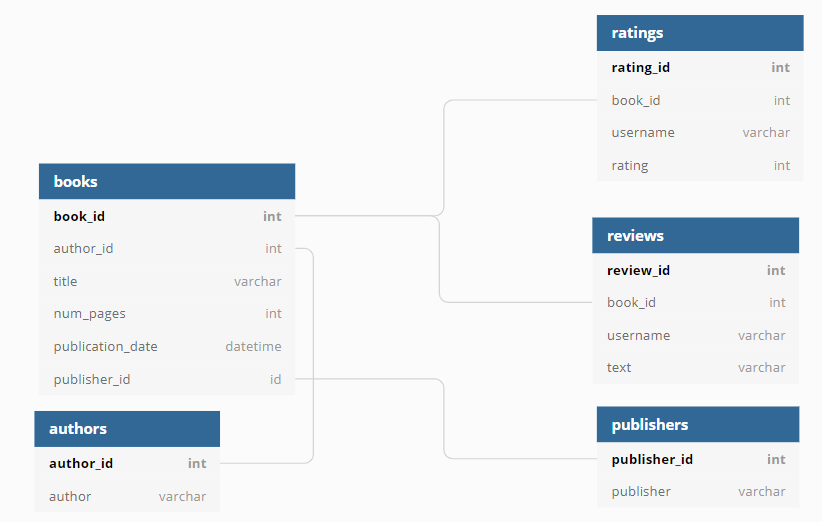

**Ход решения**
Для решения поставленных задач мы получим доступ к базе данных.
Затем исследуем имеющиеся таблицы.
После этого выполним SQL-запросы по решению задач.
Опишем выводы по каждой из решённых задач.

## Подготовка и обзор данных

### Подготовка подключения

Составим представление о данных. Импортируем специальную библиотеку pandas для обработки и анализа данных, а также другие библиотеки и объекты. 

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

Установим параметры и сохраним коннектор

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
db_config['pwd'],
db_config['host'],
db_config['port'],
db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

Получим общую информацию о таблицах. Начнем с таблицы `books`.

In [3]:
# Запрос первых строк таблицы
query_1_1 = '''
SELECT * 
FROM books 
LIMIT(5);
'''
pd.io.sql.read_sql(query_1_1, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


*Таблица books*

Содержит данные о книгах:

    book_id — идентификатор книги;
    author_id — идентификатор автора;
    title — название книги;
    num_pages — количество страниц;
    publication_date — дата публикации книги;
    publisher_id — идентификатор издателя.

Получим информацию о таблице  `authors`.

In [4]:
# Запрос первых строк таблицы
query_1_2 = '''
SELECT * 
FROM authors 
LIMIT(5);
'''
pd.io.sql.read_sql(query_1_2, con = engine)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


*Таблица authors*

Содержит данные об авторах:

    author_id — идентификатор автора;
    author — имя автора.

Получим информацию о таблице  `publishers`.

In [5]:
# Запрос первых строк таблицы
query_1_3 = '''
SELECT * 
FROM publishers 
LIMIT(5);
'''
pd.io.sql.read_sql(query_1_3, con = engine)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


*Таблица publishers*

Содержит данные об издательствах:

    publisher_id — идентификатор издательства;
    publisher — название издательства;

Получим информацию о таблице  `ratings`.

In [6]:
# Запрос первых строк таблицы
query_1_4 = '''
SELECT * 
FROM ratings 
LIMIT(5);
'''
pd.io.sql.read_sql(query_1_4, con = engine)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


*Таблица ratings*

Содержит данные о пользовательских оценках книг:

    rating_id — идентификатор оценки;
    book_id — идентификатор книги;
    username — имя пользователя, оставившего оценку;
    rating — оценка книги.

Получим информацию о таблице  `reviews`.

In [7]:
# Запрос первых строк таблицы
query_1_5 = '''
SELECT * 
FROM reviews 
LIMIT(5);
'''
pd.io.sql.read_sql(query_1_5, con = engine)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


*Таблица reviews*

Содержит данные о пользовательских обзорах:

    review_id — идентификатор обзора;
    book_id — идентификатор книги;
    username — имя автора обзора;
    text — текст обзора.

**Выводы**

База данных содержит пять таблиц с информацией о книгах, авторах, издательствах, пользовательсктх оценках и обзорах. Таблицы связаны между собой системой ключей. Можно приступать к анализу данных

## Расчет показателей

### Расчет числа книг, вышедших с 2000 года

Рассчитаем количество книг, которые вышли после 1 января 2000 года.

In [16]:
# Запрос количества строк в таблице, соответствующих условию
query_2_1 = '''
SELECT COUNT(*) AS books_2000_and_after
FROM books 
WHERE publication_date >= '2000-01-01';
'''
pd.io.sql.read_sql(query_2_1, con = engine)

,books_2000_and_after
0,821


**Вывод**:

Начиная с 2000 года было выпущено более 800 книг. Так как всего в списке книг значится 1000 наименований можно признать, что большая часть имеющихся книг относится к этому периоду.

### Количество обзоров и оценок по книгам

Для каждой книги рассчитаем количество обзоров и среднюю оценку.

In [28]:
# Расчет необходимых показателей
query_2_2 = '''
WITH b as 
(SELECT book_id, title
FROM books), 
re as 
(SELECT book_id, COUNT(*) as review_count
FROM reviews
GROUP BY book_id), 
ra as 
(SELECT book_id, AVG(rating) as avg_rating
FROM ratings
GROUP BY book_id)
SELECT b.book_id, b.title, re.review_count, ra.avg_rating
FROM b
JOIN re ON b.book_id = re.book_id 
JOIN ra ON b.book_id = ra.book_id
;
'''
pd.io.sql.read_sql(query_2_2, con = engine)

,book_id,title,review_count,avg_rating
0,1,'Salem's Lot,2,3.666667
1,2,1 000 Places to See Before You Die,1,2.500000
2,3,13 Little Blue Envelopes (Little Blue Envelope...,3,4.666667
3,4,1491: New Revelations of the Americas Before C...,2,4.500000
4,5,1776,4,4.000000
...,...,...,...,...
989,996,Wyrd Sisters (Discworld #6; Witches #2),3,3.666667
990,997,Xenocide (Ender's Saga #3),3,3.400000
991,998,Year of Wonders,4,3.200000
992,999,You Suck (A Love Story #2),2,4.500000


**Вывод:**
 
Теперь мы имеем данные для оценки пользовательского отношения к книгам: для каждой книги подготовлен средний рейтинг и количество отзывов. По этим параметрам мы можем сравнивать книги по характеру читательского отношения.

### Издательство, выпустившее больше всего книг

Определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры.  

In [36]:
# Запрос по расчету показателя
query_2_3 = '''
WITH b as 
(SELECT book_id, num_pages, publisher_id
FROM books
WHERE num_pages > 50)

SELECT p.publisher_id, p.publisher, COUNT(b.book_id) as book_count
FROM b
JOIN publishers as p ON b.publisher_id = p.publisher_id
GROUP BY p.publisher_id
ORDER BY book_count DESC
LIMIT 1
;
'''
pd.io.sql.read_sql(query_2_3, con = engine)

,publisher_id,publisher,book_count
0,212,Penguin Books,42


**Вывод**

Издательство, выпустившее наибольшее количество книг в нашей подборке - Penguin Books. Они выпустили 42 книги из тех, что не относятся к брошюрам - в них более 50 страниц. Это более 4% всех книг в библиотеке.

### Автор с самой высокой средней оценкой книг

 Определим автора с самой высокой средней оценкой книг — учтем только книги с 50 и более оценками.

In [40]:
# Запрос по расчету показателя
query_2_4 = '''
WITH b as 
(SELECT book_id, author_id
FROM books),
ra as
(SELECT book_id, COUNT(rating) as rating_count, AVG(rating) as avg_rating
FROM ratings
GROUP BY book_id
HAVING COUNT(rating) > 50)

SELECT a.author_id, a.author, AVG(ra.avg_rating) as author_rating
FROM authors a
JOIN b ON b.author_id = a.author_id
JOIN ra ON b.book_id = ra.book_id
GROUP BY a.author_id
ORDER BY author_rating DESC
LIMIT 1
;
'''
pd.io.sql.read_sql(query_2_4, con = engine)

,author_id,author,author_rating
0,236,J.K. Rowling/Mary GrandPré,4.283844


**Вывод:**

По нашим расчетам среди популярных авторов самый высокий рейтинг у автора саги о Гарри Поттере Дж.К.Роулинг. Выглядит реалистично.

### Среднее количество обзоров у часто оценивающих пользователей

Рассчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [52]:
# Запрос расчета показателя
query_2_5 = '''
WITH ra as
(SELECT username, COUNT(rating)
FROM ratings
GROUP BY username
HAVING COUNT(rating) > 50),
re as
(SELECT username, review_id
FROM reviews),
temp_re as
(SELECT COUNT(re.review_id) as review_count, re.username
FROM re
JOIN ra ON ra.username = re.username
GROUP BY re.username)
SELECT AVG(review_count)
FROM temp_re
;
'''
pd.io.sql.read_sql(query_2_5, con = engine)

,avg
0,24.333333


**Вывод:**
Пользователи, устанавливающие большое количество оценок также активно составляют обзоры. 
Среднее количество обзоров для пользователей, оставивших более 50 оценок - 24.